In [1]:
import numpy as np
import pandas as pd 

import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import RSLPStemmer

nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
language = 'portuguese'

st = RSLPStemmer()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

import string
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn import metrics

from time import time

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to C:\Users\Luan -
[nltk_data]     Nèscara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to C:\Users\Luan -
[nltk_data]     Nèscara\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Luan -
[nltk_data]     Nèscara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv('patterns.csv', encoding = 'utf-8')
display(data.shape) 

(576, 2)

In [3]:
import sys
del sys.modules["typing_extensions"]

In [4]:
# ! python -m spacy download pt_core_news_lg
from typing_extensions import Annotated, deprecated, TypeAliasType
import spacy
nlp = spacy.load('pt_core_news_lg')
import pt_core_news_lg
nlp = pt_core_news_lg.load()

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import RSLPStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')
language = 'portuguese'

st = RSLPStemmer()

stopwords = stopwords.words(language)
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to C:\Users\Luan -
[nltk_data]     Nèscara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to C:\Users\Luan -
[nltk_data]     Nèscara\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Luan -
[nltk_data]     Nèscara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Luan -
[nltk_data]     Nèscara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
def clean(doc):
    text_no_namedentities = []
    document = nlp(doc)
    ents = [e.text for e in document.ents]
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
    doc = (" ".join(text_no_namedentities))

    doc = doc.lower().strip()
    doc = doc.replace("</br>", " ") 
    doc = doc.replace("-", " ") 
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])    
    doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    return doc

In [7]:
clean(data['patterns'][0])

'faço agendar consulta técnica presencial'

In [8]:
data['patterns'] = data['patterns'].apply(clean)
data.head()

,patterns,tag
0,faço agendar consulta técnica presencial,Agendamento
1,faço agendar inspeção qualidade após instalação,Agendamento
2,faço agendar visita técnica rotina,Agendamento
3,faço agendar visita técnica urgência meio apli...,Agendamento
4,faço agendar visita técnica urgência mensagem ...,Agendamento


In [9]:
docs = list(data['patterns'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [10]:
X = docs 
y = data['tag']
print(X.shape, y.shape)

(576, 578) (576,)


In [11]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=y.value_counts().index, y=y.value_counts().tolist())])
fig.update_layout(
    title="Values in each Tag",
    xaxis_title="Tag",
    yaxis_title="Values")
fig.show()

In [12]:
SEED=123
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(460, 578) (460,)
(116, 578) (116,)


In [13]:
gnb = GaussianNB() 
%time gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 5.52 ms

Training Accuracy score: 0.9826086956521739
Testing Accuracy score: 0.7586206896551724


In [34]:
targetNames = ['Informações', 'Delivery', 'Garantia', 'Instalação', 'Suporte', 'Agendamento', 'Serviço', 'Pagamento', 'Localização', 'Despedida', 'Atendimento', 'Preço', 'Produtos', 'Promoção', 'Cumprimentos', 'Midias', 'Atendente', 'Telefone', 'Agradecimento']

In [15]:
print(classification_report(y_test, y_pred_test, target_names=targetNames))

               precision    recall  f1-score   support

  Informações       0.70      1.00      0.82         7
     Delivery       0.00      0.00      0.00         1
     Garantia       0.33      0.33      0.33         3
   Instalação       0.67      1.00      0.80         4
      Suporte       0.00      0.00      0.00         3
  Agendamento       0.62      0.50      0.56        10
      Serviço       0.80      1.00      0.89         4
    Pagamento       0.90      0.90      0.90        10
  Localização       0.91      0.91      0.91        23
    Despedida       1.00      0.67      0.80         9
  Atendimento       0.80      0.80      0.80         5
        Preço       1.00      0.67      0.80         3
     Produtos       0.75      0.50      0.60         6
     Promoção       0.60      0.75      0.67         4
 Cumprimentos       1.00      0.75      0.86         4
       Midias       0.67      1.00      0.80         4
    Atendente       0.83      0.71      0.77         7
     Tele

In [32]:
mnb = MultinomialNB() 
%time mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 4.5 ms

Training Accuracy score: 0.691304347826087
Testing Accuracy score: 0.5517241379310345


In [35]:
print(classification_report(y_test, y_pred_test, target_names=targetNames))

               precision    recall  f1-score   support

  Informações       0.78      1.00      0.88         7
     Delivery       0.00      0.00      0.00         1
     Garantia       0.00      0.00      0.00         3
   Instalação       0.00      0.00      0.00         4
      Suporte       0.00      0.00      0.00         3
  Agendamento       0.50      0.40      0.44        10
      Serviço       1.00      0.25      0.40         4
    Pagamento       1.00      0.80      0.89        10
  Localização       0.34      1.00      0.51        23
    Despedida       0.88      0.78      0.82         9
  Atendimento       1.00      0.60      0.75         5
        Preço       0.00      0.00      0.00         3
     Produtos       1.00      0.17      0.29         6
     Promoção       0.00      0.00      0.00         4
 Cumprimentos       0.00      0.00      0.00         4
       Midias       0.00      0.00      0.00         4
    Atendente       1.00      0.57      0.73         7
     Tele

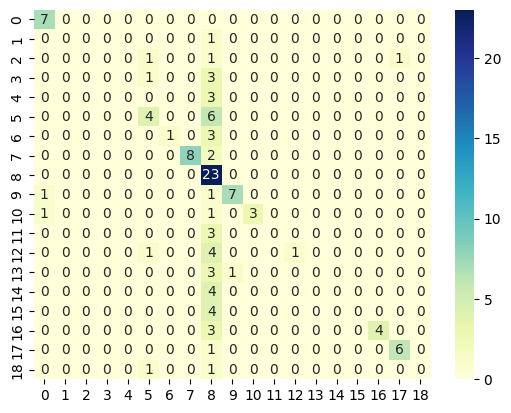

In [36]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [37]:
lr = LogisticRegression(random_state=SEED)
%time lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 46.9 ms
Wall time: 110 ms

Training Accuracy score: 0.8913043478260869
Testing Accuracy score: 0.6982758620689655


In [38]:
print(classification_report(y_test, y_pred_test, target_names=targetNames))

               precision    recall  f1-score   support

  Informações       0.88      1.00      0.93         7
     Delivery       0.00      0.00      0.00         1
     Garantia       0.00      0.00      0.00         3
   Instalação       1.00      0.25      0.40         4
      Suporte       1.00      0.33      0.50         3
  Agendamento       0.67      0.80      0.73        10
      Serviço       1.00      0.50      0.67         4
    Pagamento       1.00      1.00      1.00        10
  Localização       0.44      0.96      0.60        23
    Despedida       0.80      0.89      0.84         9
  Atendimento       1.00      0.60      0.75         5
        Preço       1.00      0.67      0.80         3
     Produtos       1.00      0.33      0.50         6
     Promoção       1.00      0.50      0.67         4
 Cumprimentos       0.00      0.00      0.00         4
       Midias       0.00      0.00      0.00         4
    Atendente       1.00      0.71      0.83         7
     Tele

In [39]:
svc =  LinearSVC(class_weight='balanced') 
%time svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 12.5 ms

Training Accuracy score: 0.991304347826087
Testing Accuracy score: 0.896551724137931


In [40]:
print(classification_report(y_test, y_pred_test, target_names=targetNames))

               precision    recall  f1-score   support

  Informações       0.88      1.00      0.93         7
     Delivery       0.00      0.00      0.00         1
     Garantia       1.00      1.00      1.00         3
   Instalação       0.80      1.00      0.89         4
      Suporte       0.75      1.00      0.86         3
  Agendamento       0.89      0.80      0.84        10
      Serviço       1.00      1.00      1.00         4
    Pagamento       1.00      1.00      1.00        10
  Localização       0.91      0.91      0.91        23
    Despedida       0.82      1.00      0.90         9
  Atendimento       0.80      0.80      0.80         5
        Preço       1.00      1.00      1.00         3
     Produtos       1.00      0.33      0.50         6
     Promoção       1.00      1.00      1.00         4
 Cumprimentos       0.80      1.00      0.89         4
       Midias       0.67      1.00      0.80         4
    Atendente       1.00      0.86      0.92         7
     Tele

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=SEED)
%time dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 17 ms

Training Accuracy score: 0.9978260869565218
Testing Accuracy score: 0.7241379310344828


In [42]:
print(classification_report(y_test, y_pred_test, target_names=targetNames))

               precision    recall  f1-score   support

  Informações       0.83      0.71      0.77         7
     Delivery       0.00      0.00      0.00         1
     Garantia       0.75      1.00      0.86         3
   Instalação       0.40      0.50      0.44         4
      Suporte       0.21      1.00      0.35         3
  Agendamento       0.70      0.70      0.70        10
      Serviço       1.00      0.50      0.67         4
    Pagamento       1.00      1.00      1.00        10
  Localização       0.81      0.74      0.77        23
    Despedida       0.88      0.78      0.82         9
  Atendimento       0.80      0.80      0.80         5
        Preço       1.00      1.00      1.00         3
     Produtos       1.00      0.17      0.29         6
     Promoção       1.00      0.50      0.67         4
 Cumprimentos       0.43      0.75      0.55         4
       Midias       0.75      0.75      0.75         4
    Atendente       1.00      0.86      0.92         7
     Tele

In [43]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt),
               ('Logistic Regression', lr),
                ('Naive Bayes', gnb)
              ]
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred_train=vc.predict(X_train)
y_pred_test = vc.predict(X_test)
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 0.9956521739130435
Testing Accuracy score: 0.8103448275862069


In [44]:
predictions = pd.Series(vc.predict(X), name="relevant")
results = pd.concat([predictions],axis=1)
results.to_csv("patternPrediction.csv",index=False)

In [45]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
